# EDA

## Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter

In [2]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [5]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df = pd.concat([df_train, df_test])

print('train dims: ', df_train.shape)
print('test  dims: ', df_test.shape)
print('df    dims: ', df.shape)

train dims:  (1460, 81)
test  dims:  (1459, 80)
df    dims:  (2919, 81)


In [4]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
# eyeball unique values in each feature and see what is used to indicate a missing value

for i in range(0, df.shape[1]):
    print(df.columns[i])
    print(df.iloc[:, i].unique(), '\n')

Id
[   1    2    3 ... 2917 2918 2919] 

MSSubClass
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40 150] 

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH' nan] 

LotFrontage
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.  26.
  25. 119.  31.  28. 117. 113. 125. 135. 136.  22. 123. 195. 155. 126.
 200. 131. 133.] 

LotArea
[ 8450  9600 11250 ...  1894 20000 10441] 

Street
['Pave' 'Grvl'] 

Alley
[nan 'Grvl' 'Pave'] 

LotShape
['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour
['Lvl' 'B

## Feature exploration

What follows is a first pass EDA. The aim here is to get an idea of correlations, outliers, interesting trends and other stuff that will prove useful in creating a final recoding of the dataset that will be fed into the training model. To achieve that, we will investigate the features in batches, impute missing values and do some preliminary recoding. As, such dummification, standardization etc. will be performed as a second step.

Text(0.5, 1.0, 'Missing values - Test')

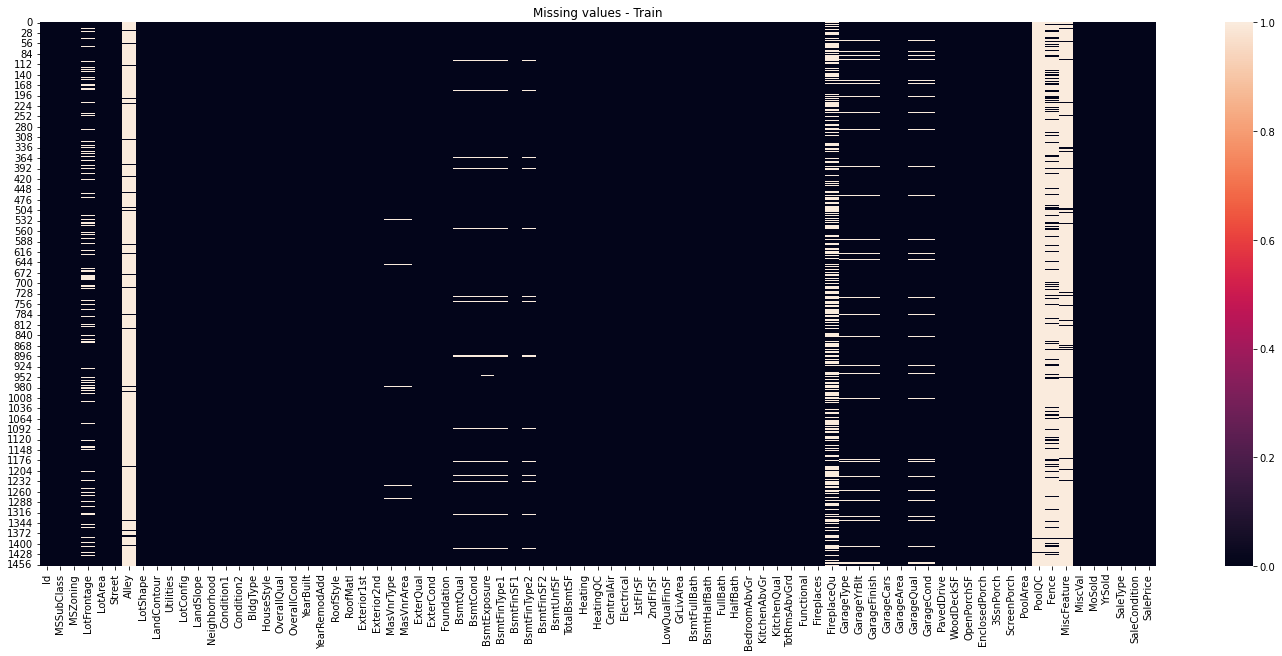

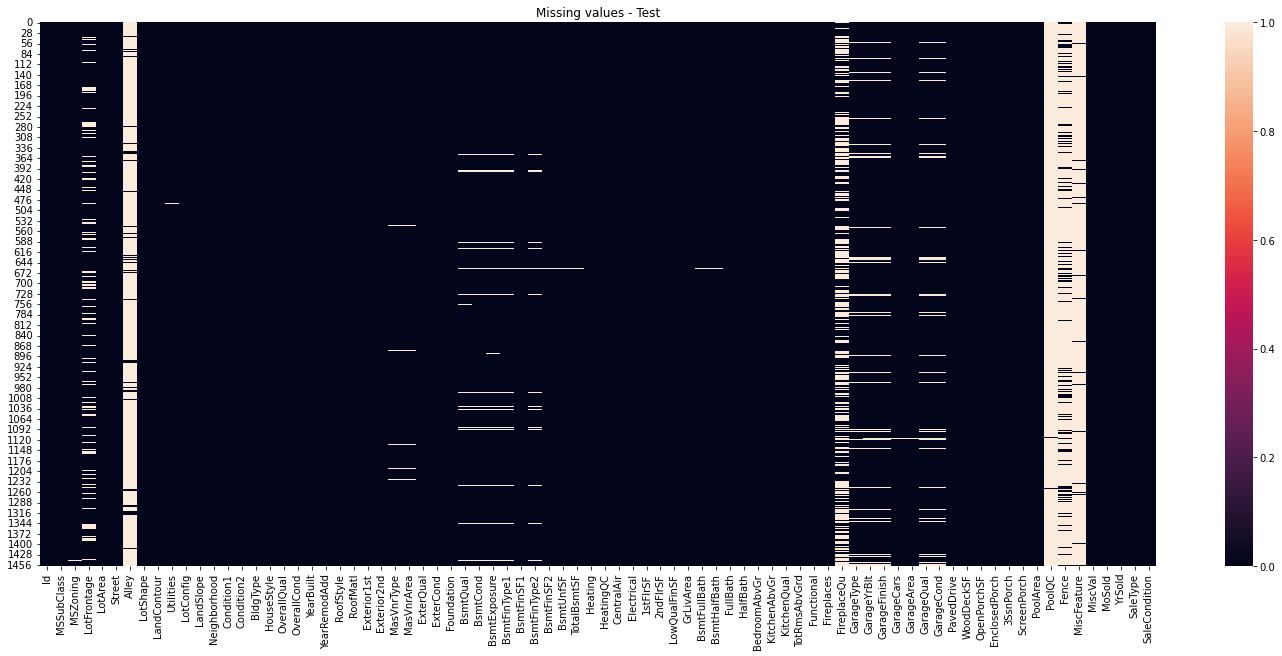

In [7]:
# create a heatmap visualization of missing values in train and test datasets.

fig, ax = plt.subplots(figsize = (25, 10))
sns.heatmap(df_train.isnull())
plt.title('Missing values - Train')

fig, ax = plt.subplots(figsize = (25, 10))
sns.heatmap(df_test.isnull())
plt.title('Missing values - Test')

As mentioned in the data description file, 'NA' does not always indicate a missing value but rather that there is no such feature (e.g no garage, no alley, etc.). The visualization above supports this - if the property has no garage, garage related features are 'nan'. Same for basement features. We will start exploring features and imputing/recoding 'missing values' accordingly for each feature, while consulting the data description file.

### Some useful functions

In [8]:
# create dataframe to summarize data types, missing value count and frequency for each of the 3 datasets. 
# put into a function as I'm going to use this quite a bit.

def dfsum(): 
    d = {'dtype df': df.dtypes,
         'dtype train': df_train.dtypes,
         'dtype test': df_test.dtypes,
         'null df': df.isnull().sum(),
         'null df %': df.isnull().sum() / len(df) * 100,
         'null train': df_train.isnull().sum(),
         'null train %': df_train.isnull().sum() / len(df_train) * 100,
         'null test': df_test.isnull().sum(),
         'null test %': df_test.isnull().sum() / len(df_test) * 100
        }
    display(pd.DataFrame(data=d).sort_values(by='null df', ascending=False))

In [9]:
# function that takes a dataframe and a string as inputs and outputs a dataframe of features containing the string in their 
# name, as well as a counter of their unique values. Options to return .info(), .describe()

def feats_cont(data, featstr, summary='summary', counter=False):
    if summary == 'summary':
        a = data.loc[:, data.columns.str.contains(featstr)]
        display(a)
    elif summary == 'info':
        a = data.loc[:, data.columns.str.contains(featstr)].info()
        display(a)
    elif summary == 'describe':
        a = data.loc[:, data.columns.str.contains(featstr)].describe()
        display(a)
    elif summary == 'isnull':
        a = data.loc[:, data.columns.str.contains(featstr)].isnull().sum()
        print('Count of nan values: ')
        display (a)
    else:
        print('Unsupported summary option', '\n')
    
    if counter==True:
        print('Value counter in matching features: ', '\n')
        for i in range(0, a.shape[1]):
            print(a.columns[i], '\n', Counter(a.iloc[:, i]), '\n')
        


In [10]:
# function to display a simple Pearson correlation coefficient between two variables.
def easycorr(a, b):
    corr = np.corrcoef(a, b)[1, 0]
    print('Corr coef: ', a.name, 'vs', b.name, ': ', '{:.4f}'.format(corr))

### Overview

In [11]:
dfsum()

,dtype df,dtype train,dtype test,null df,null df %,null train,null train %,null test,null test %
PoolQC,object,object,object,2909,99.657417,1453,99.520548,1456.0,99.794380
MiscFeature,object,object,object,2814,96.402878,1406,96.301370,1408.0,96.504455
Alley,object,object,object,2721,93.216855,1369,93.767123,1352.0,92.666210
Fence,object,object,object,2348,80.438506,1179,80.753425,1169.0,80.123372
SalePrice,float64,int64,NaN,1459,49.982871,0,0.000000,NaN,NaN
FireplaceQu,object,object,object,1420,48.646797,690,47.260274,730.0,50.034270
LotFrontage,float64,float64,float64,486,16.649538,259,17.739726,227.0,15.558602
GarageQual,object,object,object,159,5.447071,81,5.547945,78.0,5.346127
GarageFinish,object,object,object,159,5.447071,81,5.547945,78.0,5.346127
GarageCond,object,object,object,159,5.447071,81,5.547945,78.0,5.346127


### Pool features

In [12]:
# according to the data description file, nan here means that there is no pool

feats_cont(df, 'Pool', counter=True)

,PoolArea,PoolQC
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
...,...,...
1454,0,NaN
1455,0,NaN
1456,0,NaN
1457,0,NaN


Value counter in matching features:  

PoolArea 
 Counter({0: 2906, 512: 1, 648: 1, 576: 1, 555: 1, 480: 1, 519: 1, 738: 1, 144: 1, 368: 1, 444: 1, 228: 1, 561: 1, 800: 1}) 

PoolQC 
 Counter({nan: 2909, 'Ex': 4, 'Gd': 4, 'Fa': 2}) 



For the 2906 observations we can recode a new level 'None' in PoolQC. Still, 3 observations have a pool (area > 0) but have a missing value in pool quality. There are several options here to impute these 3 values - impute with the mode or create a separate ML model to impute. Considering that there is a very limited number of properties with a pool and the pool area does not vary greatly, I'd rather just drop these 2 features and create a binary feature showing if the property has a pool or not.

In [13]:
# create the new feature
df_train['HasPool'] = np.where(df_train.PoolArea == 0, 0, 1)
df_test['HasPool'] = np.where(df_test.PoolArea == 0, 0, 1)

# sanity check
display(df_train.loc[:, df_train.columns.str.contains('Pool')].sort_values(by='HasPool', ascending=False).head(10))
display(df_test.loc[:, df_test.columns.str.contains('Pool')].sort_values(by='HasPool', ascending=False).head(10))

,PoolArea,PoolQC,HasPool
1298,480,Gd,1
810,648,Fa,1
1182,555,Ex,1
1386,519,Fa,1
197,512,Ex,1
1170,576,Gd,1
1423,738,Gd,1
979,0,NaN,0
978,0,NaN,0
977,0,NaN,0


,PoolArea,PoolQC,HasPool
1139,561,NaN,1
514,144,Ex,1
1250,800,Gd,1
1043,444,NaN,1
960,368,NaN,1
1113,228,Ex,1
975,0,NaN,0
974,0,NaN,0
973,0,NaN,0
972,0,NaN,0


Correlation with Sale Price:
PoolArea    0.092404
HasPool     0.093708
dtype: float64


D:\ML\venvs\defenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'vs Pool Quality')

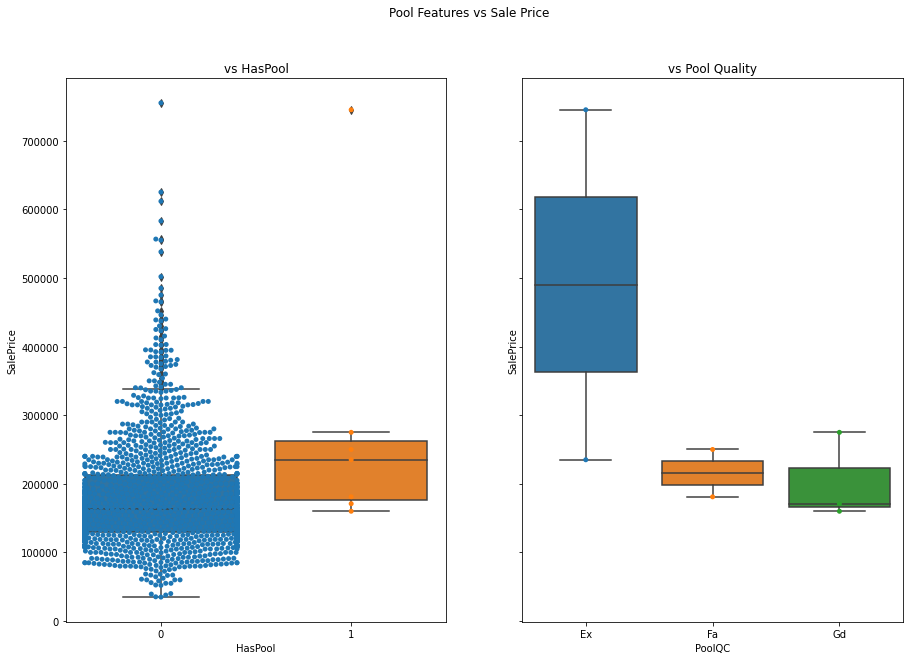

In [14]:
# correlation with Sale Price

print('Correlation with Sale Price:')
print(df_train.loc[:, df_train.columns.str.contains('Pool')].corrwith(df_train.SalePrice).sort_values())

# couple of useful exploratory plots

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 10))
fig.suptitle('Pool Features vs Sale Price \n')

sns.boxplot(ax=axes[0], data=df_train, y = 'SalePrice', x = 'HasPool')
sns.swarmplot(ax=axes[0], data=df_train, y = 'SalePrice', x = 'HasPool')
axes[0].set_title('vs HasPool')

sns.boxplot(ax=axes[1], data=df_train, y = 'SalePrice', x = 'PoolQC')
sns.swarmplot(ax=axes[1], data=df_train, y = 'SalePrice', x = 'PoolQC')
axes[1].set_title('vs Pool Quality')

Having a pool has a weak positive correlation with Sale Price. We also see a visualisation of the correlation between Pool Quality and Sale Price - Having an exceptional quality pool visually seems to make a difference, but given we have only 2 such observations we cannot claim that with any confidence. Dropping these features and replacing with the new binary feature seems like a move in the right direction.

In [15]:
# dropping the columns, then putting back the df together.

df_train.drop(columns=['PoolArea', 'PoolQC'], inplace=True)
df_test.drop(columns=['PoolArea', 'PoolQC'], inplace=True)
df = pd.concat([df_train, df_test])

# sanity check

df.shape

## Miscelaneous features

In [19]:
# explore miscelaneous features
feats_cont(df, 'Misc', counter=True)

,MiscFeature,MiscVal
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
...,...,...
1454,NaN,0
1455,NaN,0
1456,NaN,0
1457,Shed,700


Value counter in matching features:  

MiscFeature 
 Counter({nan: 2814, 'Shed': 95, 'Gar2': 5, 'Othr': 4, 'TenC': 1}) 

MiscVal 
 Counter({0: 2816, 400: 18, 500: 13, 450: 9, 600: 8, 700: 7, 2000: 7, 1200: 3, 1500: 3, 650: 3, 480: 2, 2500: 2, 4500: 2, 3000: 2, 350: 1, 15500: 1, 800: 1, 3500: 1, 1300: 1, 54: 1, 620: 1, 560: 1, 1400: 1, 8300: 1, 1150: 1, 12500: 1, 300: 1, 80: 1, 490: 1, 900: 1, 750: 1, 6500: 1, 1000: 1, 17000: 1, 1512: 1, 455: 1, 460: 1, 420: 1}) 



Again, for the 2814 observations that do not have an additional misc feature we can recode a new level 'None' in MiscFeature. Still, there are observations with a 0 value misc feature, as well as, possibly, observations with a missing value in MiscFeature (if they have MiscVal > 0).

In [20]:
# check for observations with misc features that have 0 value
df.loc[(df.MiscVal == 0) & (df.MiscFeature.notnull()), ['MiscVal', 'MiscFeature']]

,MiscVal,MiscFeature
873,0,Othr
1200,0,Shed
971,0,Shed


Can a shed have 0 value or is it an error? Let's not bother.

In [21]:
# check for observations with missing values in misc feature (value > 0)
display(df_train.loc[(df_train.MiscVal > 0) & (df_train.MiscFeature.isnull()), ['MiscVal', 'MiscFeature']])
display(df_test.loc[(df_test.MiscVal > 0) & (df_test.MiscFeature.isnull()), ['MiscVal', 'MiscFeature']])

,MiscVal,MiscFeature


,MiscVal,MiscFeature
1089,17000,NaN


Indeed there is a property in the test set with MiscVal > 0 but 'nan' in the MiscFeature. This is a missing value that we'll try to impute.

In [22]:
# in the train set replace nan values in misc feature with 'None'
df_train.MiscFeature.where(df_train.MiscFeature.notnull(), 'None', inplace=True)

# sanity check
Counter(df_train.MiscFeature)

Counter({'None': 1406, 'Shed': 49, 'Gar2': 2, 'Othr': 2, 'TenC': 1})

Let's see some plots.

<AxesSubplot:xlabel='MiscFeature', ylabel='MiscVal'>

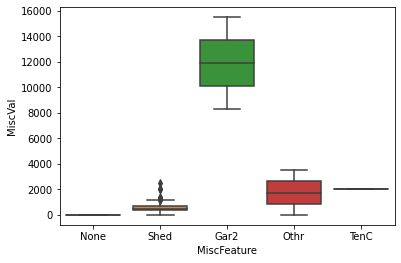

In [23]:
sns.boxplot(data=df_train, x = 'MiscFeature', y = 'MiscVal')

Based on the value of different misc features in the training set, the observation with a value of 17000 in the test set is more likely to be a garage.

In [24]:
# in the test set: first check MiscFeature for missing values that do have a MiscVal and replace with 'Gar2', 
# then replace all other nans (that have MiscVal = 0) with 'None'

# get a counter before the transformation
print('pre: ', Counter(df_test.MiscFeature))

# do the replacement
df_test['MiscFeature'] = np.where((df_test.MiscVal > 0) & df_test.MiscFeature.isnull(), 'Gar2', df_test.MiscFeature)
df_test['MiscFeature'] = np.where(df_test.MiscFeature.isnull(), 'None', df_test.MiscFeature)

# sanity check
print('post: ', Counter(df_test.MiscFeature))

pre:  Counter({nan: 1408, 'Shed': 46, 'Gar2': 3, 'Othr': 2})
post:  Counter({'None': 1407, 'Shed': 46, 'Gar2': 4, 'Othr': 2})


Finally, let's explore a little bit the two features in the training set.

Corr coef:  MiscVal vs SalePrice :  -0.0212


Text(0.5, 1.0, 'vs MiscVal')

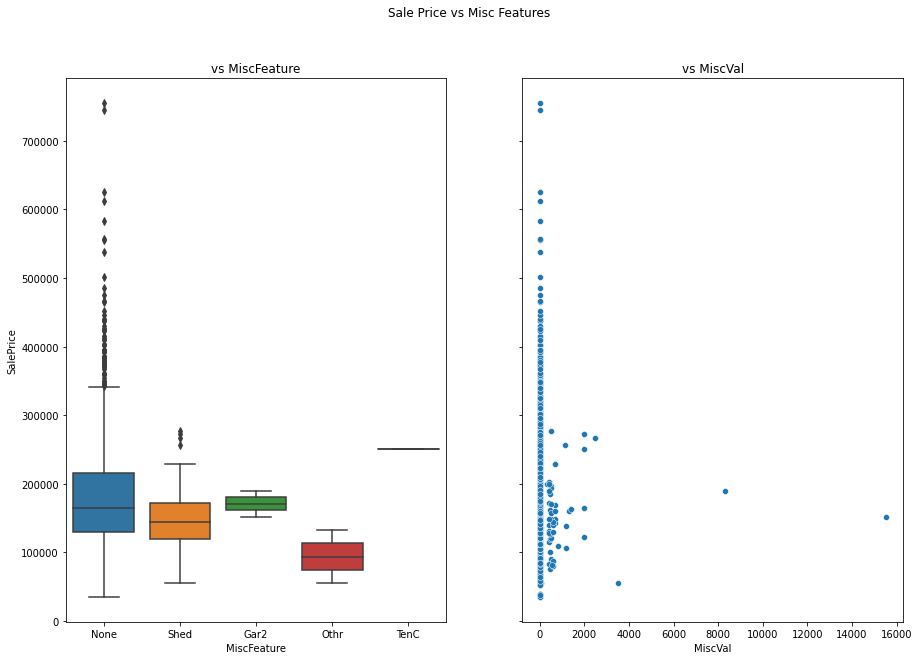

In [25]:
# correlation with Sale Price

easycorr(df_train.MiscVal, df_train.SalePrice)

# couple of useful exploratory plots

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 10))
fig.suptitle('Sale Price vs Misc Features \n')

sns.boxplot(ax=axes[0], data=df_train, x = 'MiscFeature', y = 'SalePrice')
axes[0].set_title('vs MiscFeature')

sns.scatterplot(ax=axes[1], data=df_train, x = 'MiscVal', y = 'SalePrice')
axes[1].set_title('vs MiscVal')

Having a misc feature corresponds to a lower sales price. The correlation is weak and with very low value counts. Let's create a 'HasMisc' feature that shows if the property has a misc feature or not.

Corr coef:  HasMisc vs SalePrice :  -0.0723


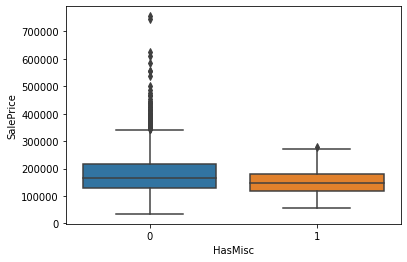

In [26]:
# create binary feature 'HasMisc'
df_train['HasMisc'] = np.where(df_train.MiscFeature == 'None', 0, 1)

# calculate correlation with SalePrice and plot
sns.boxplot(data=df_train, x='HasMisc', y='SalePrice')
easycorr(df_train.HasMisc, df_train.SalePrice)

# drop binary feature
df_train.drop('HasMisc', axis=1, inplace=True)

Let's add the new binary feature to the dataset. We'll keep the features MiscFeature and MiscVal for now. We'll likely need to select only some of them in the model feature selection progress to account for the multicollinearity we've just introduced. MiscFeature will need dummification later on.

In [27]:
df_train['HasMisc'] = np.where(df_train.MiscFeature=='None', 0, 1)
df_test['HasMisc'] = np.where(df_test.MiscFeature=='None', 0, 1)
df = pd.concat([df_train, df_test])

# sanity check
feats_cont(df, 'Misc', counter=True)
feats_cont(df, 'Misc', summary='isnull')
df.shape

,MiscFeature,MiscVal,HasMisc
0,None,0,0
1,None,0,0
2,None,0,0
3,None,0,0
4,None,0,0
...,...,...,...
1454,None,0,0
1455,None,0,0
1456,None,0,0
1457,Shed,700,1


Value counter in matching features:  

MiscFeature 
 Counter({'None': 2813, 'Shed': 95, 'Gar2': 6, 'Othr': 4, 'TenC': 1}) 

MiscVal 
 Counter({0: 2816, 400: 18, 500: 13, 450: 9, 600: 8, 700: 7, 2000: 7, 1200: 3, 1500: 3, 650: 3, 480: 2, 2500: 2, 4500: 2, 3000: 2, 350: 1, 15500: 1, 800: 1, 3500: 1, 1300: 1, 54: 1, 620: 1, 560: 1, 1400: 1, 8300: 1, 1150: 1, 12500: 1, 300: 1, 80: 1, 490: 1, 900: 1, 750: 1, 6500: 1, 1000: 1, 17000: 1, 1512: 1, 455: 1, 460: 1, 420: 1}) 

HasMisc 
 Counter({0: 2813, 1: 106}) 

Count of nan values: 


MiscFeature    0
MiscVal        0
HasMisc        0
dtype: int64

(2919, 81)

In [28]:
dfsum()

,dtype df,dtype train,dtype test,null df,null df %,null train,null train %,null test,null test %
Alley,object,object,object,2721,93.216855,1369,93.767123,1352.0,92.666210
Fence,object,object,object,2348,80.438506,1179,80.753425,1169.0,80.123372
SalePrice,float64,int64,NaN,1459,49.982871,0,0.000000,NaN,NaN
FireplaceQu,object,object,object,1420,48.646797,690,47.260274,730.0,50.034270
LotFrontage,float64,float64,float64,486,16.649538,259,17.739726,227.0,15.558602
GarageFinish,object,object,object,159,5.447071,81,5.547945,78.0,5.346127
GarageQual,object,object,object,159,5.447071,81,5.547945,78.0,5.346127
GarageCond,object,object,object,159,5.447071,81,5.547945,78.0,5.346127
GarageYrBlt,float64,float64,float64,159,5.447071,81,5.547945,78.0,5.346127
GarageType,object,object,object,157,5.378554,81,5.547945,76.0,5.209047


### Alley

In [29]:
feats_cont(df, 'Alley', counter=True)

,Alley
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1454,NaN
1455,NaN
1456,NaN
1457,NaN


Value counter in matching features:  

Alley 
 Counter({nan: 2721, 'Grvl': 120, 'Pave': 78}) 



According to the data description, nan values here indicate that there is no alley access. We'll recode nans to 'none'

In [30]:
df_train.Alley = np.where(df_train.Alley.isnull(), 'None', df_train.Alley)
df_test.Alley = np.where(df_test.Alley.isnull(), 'None', df_test.Alley)
df = pd.concat([df_train, df_test])

<AxesSubplot:xlabel='Alley', ylabel='SalePrice'>

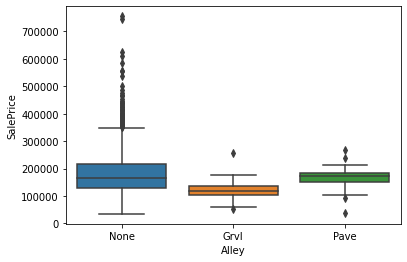

In [31]:
sns.boxplot(data=df_train, x='Alley', y='SalePrice')

There appears to be difference in sales price depending on the type of alley. ANOVA could be used to verify. The feature needs one-hot encoding.

In [32]:
dfsum()

,dtype df,dtype train,dtype test,null df,null df %,null train,null train %,null test,null test %
Fence,object,object,object,2348,80.438506,1179,80.753425,1169.0,80.123372
SalePrice,float64,int64,NaN,1459,49.982871,0,0.000000,NaN,NaN
FireplaceQu,object,object,object,1420,48.646797,690,47.260274,730.0,50.034270
LotFrontage,float64,float64,float64,486,16.649538,259,17.739726,227.0,15.558602
GarageYrBlt,float64,float64,float64,159,5.447071,81,5.547945,78.0,5.346127
GarageCond,object,object,object,159,5.447071,81,5.547945,78.0,5.346127
GarageFinish,object,object,object,159,5.447071,81,5.547945,78.0,5.346127
GarageQual,object,object,object,159,5.447071,81,5.547945,78.0,5.346127
GarageType,object,object,object,157,5.378554,81,5.547945,76.0,5.209047
BsmtCond,object,object,object,82,2.809181,37,2.534247,45.0,3.084304


### Fence

In [33]:
feats_cont(df, 'ence', counter=True )

,Fence
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1454,NaN
1455,NaN
1456,NaN
1457,MnPrv


Value counter in matching features:  

Fence 
 Counter({nan: 2348, 'MnPrv': 329, 'GdPrv': 118, 'GdWo': 112, 'MnWw': 12}) 



According to the data description, nan here means that there is no fence. We'll recode nans to 'None'

In [34]:
df_train.Fence = np.where(df_train.Fence.isnull(), 'None', df_train.Fence)
df_test.Fence = np.where(df_test.Fence.isnull(), 'None', df_test.Fence)
df = pd.concat([df_train, df_test])

<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

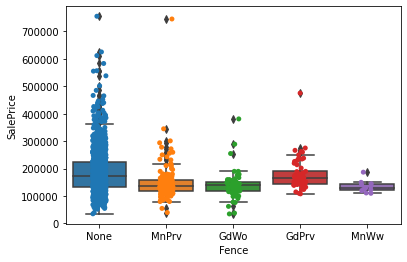

In [35]:
sns.stripplot(data = df_train, x='Fence', y='SalePrice')
sns.boxplot(data = df_train, x='Fence', y='SalePrice')

Having a fence doesn't seem to have a significant impact on the sale price. The feature will need dummification.

### Fireplace

In [36]:
feats_cont(df, 'ireplac', counter=True)

,Fireplaces,FireplaceQu
0,0,NaN
1,1,TA
2,1,TA
3,1,Gd
4,1,TA
...,...,...
1454,0,NaN
1455,0,NaN
1456,1,TA
1457,0,NaN


Value counter in matching features:  

Fireplaces 
 Counter({0: 1420, 1: 1268, 2: 219, 3: 11, 4: 1}) 

FireplaceQu 
 Counter({nan: 1420, 'Gd': 744, 'TA': 592, 'Fa': 74, 'Po': 46, 'Ex': 43}) 



Again, we can replace nan values in FireplaceQu with 'None'.

In [37]:
df_train.FireplaceQu = np.where(df_train.FireplaceQu.isnull(), 'None', df_train.FireplaceQu)
df_test.FireplaceQu = np.where(df_test.FireplaceQu.isnull(), 'None', df_test.FireplaceQu)
df = pd.concat([df_train, df_test])

# sanity check
feats_cont(df, 'ireplace', 'isnull')

Count of nan values: 


Fireplaces     0
FireplaceQu    0
dtype: int64

Correlation with Sale Price:
Fireplaces    0.466929
dtype: float64


Text(0.5, 1.0, 'vs Fireplace')

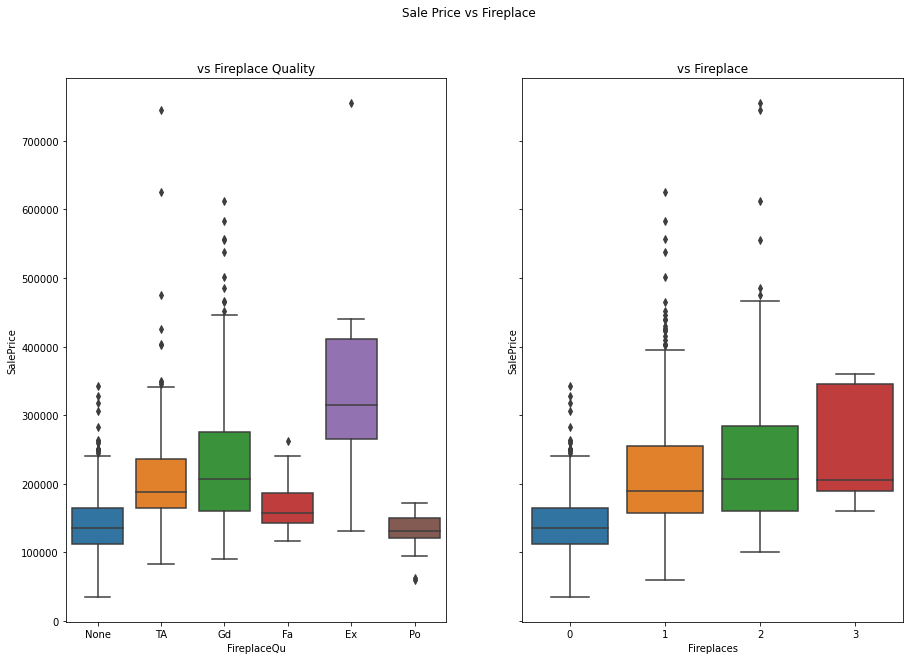

In [38]:
# correlation with Sale Price

print('Correlation with Sale Price:')
print(df_train.loc[:, df_train.columns.str.contains('ireplace')].corrwith(df_train.SalePrice).sort_values())

# couple of useful exploratory plots for fireplace features

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 10))
fig.suptitle('Sale Price vs Fireplace \n')

sns.boxplot(ax=axes[0], data=df_train, x = 'FireplaceQu', y = 'SalePrice')
axes[0].set_title('vs Fireplace Quality')

sns.boxplot(ax=axes[1], data=df_train, x = 'Fireplaces', y = 'SalePrice')
axes[1].set_title('vs Fireplace')

The number of fireplaces shows us the highest correlation with sales price we've seen so far (0.47). Fireplace quality also seems to be correlated. It makes sense to treat it as an ordinal feature, as values range from poor to excellent. This is a concept we will apply later on to other similarly valued variables.

In [39]:
# replace string values with numerical values in fireplace quality.

fp_levels = [0, 1, 2, 3, 4, 5]
fp_quality = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
df_train['FireplaceQu'] = df_train['FireplaceQu'].replace(fp_quality, fp_levels)
df_test['FireplaceQu'] = df_test['FireplaceQu'].replace(fp_quality, fp_levels)
df = pd.concat([df_train, df_test])

# quick sanity check
df.FireplaceQu.dtype

dtype('int64')

Correlation with Sale Price:
Fireplaces     0.466929
FireplaceQu    0.520438
dtype: float64


Text(0.5, 1.0, 'vs Fireplace')

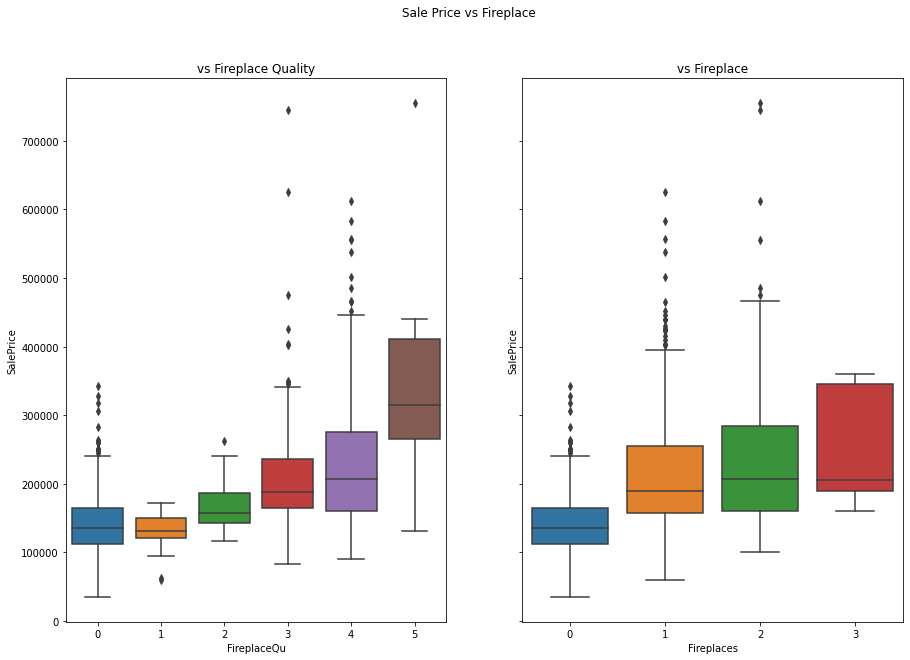

In [40]:
# correlation with Sale Price

print('Correlation with Sale Price:')
print(df_train.loc[:, df_train.columns.str.contains('ireplace')].corrwith(df_train.SalePrice).sort_values())

# couple of useful exploratory plots for fireplace features

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 10))
fig.suptitle('Sale Price vs Fireplace \n')

sns.boxplot(ax=axes[0], data=df_train, x = 'FireplaceQu', y = 'SalePrice')
axes[0].set_title('vs Fireplace Quality')

sns.boxplot(ax=axes[1], data=df_train, x = 'Fireplaces', y = 'SalePrice')
axes[1].set_title('vs Fireplace')

Fireplace Quality is also positively correlated (0.52)

In [41]:
dfsum()

,dtype df,dtype train,dtype test,null df,null df %,null train,null train %,null test,null test %
SalePrice,float64,int64,NaN,1459,49.982871,0,0.000000,NaN,NaN
LotFrontage,float64,float64,float64,486,16.649538,259,17.739726,227.0,15.558602
GarageFinish,object,object,object,159,5.447071,81,5.547945,78.0,5.346127
GarageCond,object,object,object,159,5.447071,81,5.547945,78.0,5.346127
GarageYrBlt,float64,float64,float64,159,5.447071,81,5.547945,78.0,5.346127
GarageQual,object,object,object,159,5.447071,81,5.547945,78.0,5.346127
GarageType,object,object,object,157,5.378554,81,5.547945,76.0,5.209047
BsmtCond,object,object,object,82,2.809181,37,2.534247,45.0,3.084304
BsmtExposure,object,object,object,82,2.809181,38,2.602740,44.0,3.015764
BsmtQual,object,object,object,81,2.774923,37,2.534247,44.0,3.015764


### Lot features

In [42]:
feats_cont(df, 'Lot', counter=True)

,LotFrontage,LotArea,LotShape,LotConfig
0,65.0,8450,Reg,Inside
1,80.0,9600,Reg,FR2
2,68.0,11250,IR1,Inside
3,60.0,9550,IR1,Corner
4,84.0,14260,IR1,FR2
...,...,...,...,...
1454,21.0,1936,Reg,Inside
1455,21.0,1894,Reg,Inside
1456,160.0,20000,Reg,Inside
1457,62.0,10441,Reg,Inside


Value counter in matching features:  

LotFrontage 
 Counter({60.0: 276, 80.0: 137, 70.0: 133, 50.0: 117, 75.0: 105, 65.0: 93, 85.0: 76, 21.0: 50, 24.0: 49, 63.0: 47, 78.0: 46, 90.0: 46, 68.0: 44, 64.0: 43, 72.0: 39, 74.0: 39, 73.0: 33, 62.0: 31, 52.0: 28, 100.0: 28, 82.0: 28, 79.0: 28, 51.0: 27, 59.0: 27, 66.0: 26, 57.0: 26, 76.0: 25, 55.0: 24, 53.0: 24, 43.0: 23, 88.0: 22, 67.0: 22, 69.0: 20, 44.0: 19, 71.0: 19, 35.0: 19, 56.0: 19, 84.0: 18, 81.0: 18, 61.0: 17, 58.0: 17, 48.0: 16, 40.0: 16, 34.0: 16, 110.0: 15, 95.0: 15, 77.0: 15, 92.0: 15, 86.0: 15, 91.0: 14, 120.0: 14, 41.0: 14, 96.0: 14, 83.0: 13, 93.0: 13, 98.0: 12, 105.0: 12, 94.0: 12, 42.0: 12, 107.0: 11, 30.0: 11, 87.0: 11, 89.0: 10, 54.0: 10, 102.0: 10, 45.0: 10, 47.0: 8, 32.0: 8, 36.0: 8, 37.0: 7, 108.0: 6, 99.0: 6, 103.0: 6, 39.0: 6, 97.0: 5, 49.0: 5, 130.0: 5, 104.0: 5, 114.0: 5, 112.0: 4, 129.0: 4, 118.0: 4, 38.0: 4, 109.0: 4, 106.0: 4, 124.0: 4, 101.0: 3, 115.0: 3, 33.0: 3, 121.0: 3, 134.0: 3, 128.0: 3, 160.0: 3, 46.0: 3

In [43]:
# check for nans and data types

feats_cont(df, 'Lot', summary = 'info')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  2433 non-null   float64
 1   LotArea      2919 non-null   int64  
 2   LotShape     2919 non-null   object 
 3   LotConfig    2919 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 114.0+ KB


None

In [44]:
# quick mean, std and quantile check in the training set

feats_cont(df_train, 'Lot', summary = 'describe')

,LotFrontage,LotArea
count,1201.000000,1460.000000
mean,70.049958,10516.828082
std,24.284752,9981.264932
min,21.000000,1300.000000
25%,59.000000,7553.500000
50%,69.000000,9478.500000
75%,80.000000,11601.500000
max,313.000000,215245.000000


We'll have to impute the missing values for LotFrontage. Also, there seem to exist extreme outliers in these features. We'll use plots to investigate the train set.

D:\ML\venvs\defenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotArea', ylabel='Density'>

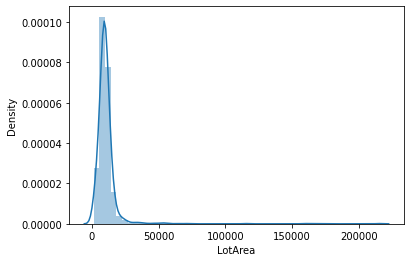

In [45]:
sns.distplot(df_train['LotArea'])

A log transform will help here.

D:\ML\venvs\defenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotArea', ylabel='Density'>

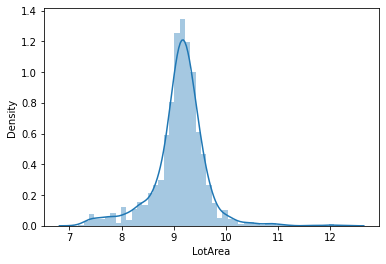

In [47]:
sns.distplot(np.log(df_train['LotArea']))

Corr coef:  LotArea vs SalePrice :  0.2638


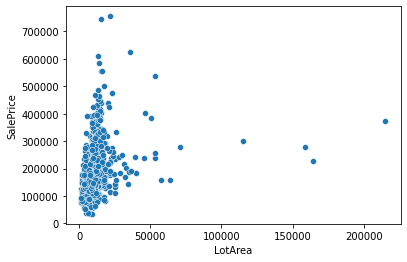

In [48]:
sns.scatterplot(x = df_train.LotArea, y = df_train.SalePrice)
easycorr(df_train.LotArea, df_train.SalePrice)

4 outliers with LotArea > 100000 that will certainly have high leverage. There is correlation with sales price (0.26). Let's see if that would change if the outliers were to be removed.

In [49]:
# general check for these 4 properties

df_train.loc[df_train.LotArea > 100000, :]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasPool,HasMisc
249,250,50,RL,NaN,159000,Pave,None,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697,Unf,0,747,1444,GasA,Gd,Y,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,3,Attchd,1958.0,Fin,2,389,TA,TA,Y,0,98,0,0,0,None,Shed,500,6,2007,WD,Normal,277000,0,1
313,314,20,RL,150.0,215245,Pave,None,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,4,Attchd,1965.0,RFn,2,513,TA,TA,Y,0,0,0,0,0,None,None,0,6,2009,WD,Normal,375000,0,0
335,336,190,RL,NaN,164660,Grvl,None,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,147,103,1499,GasA,Ex,Y,SBrkr,1619,167,0,1786,2,0,2,0,3,1,TA,7,Typ,2,4,Attchd,1965.0,Fin,2,529,TA,TA,Y,670,0,0,0,0,None,Shed,700,8,2008,WD,Normal,228950,0,1
706,707,20,RL,NaN,115149,Pave,None,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219,Unf,0,424,1643,GasA,TA,Y,SBrkr,1824,0,0,1824,1,0,2,0,2,1,Gd,5,Typ,2,3,Attchd,1971.0,Unf,2,739,TA,TA,Y,380,48,0,0,0,None,None,0,6,2007,WD,Normal,302000,0,0


Text(0.5, 1.0, 'SalePrice(log) vs LotArea(log)')

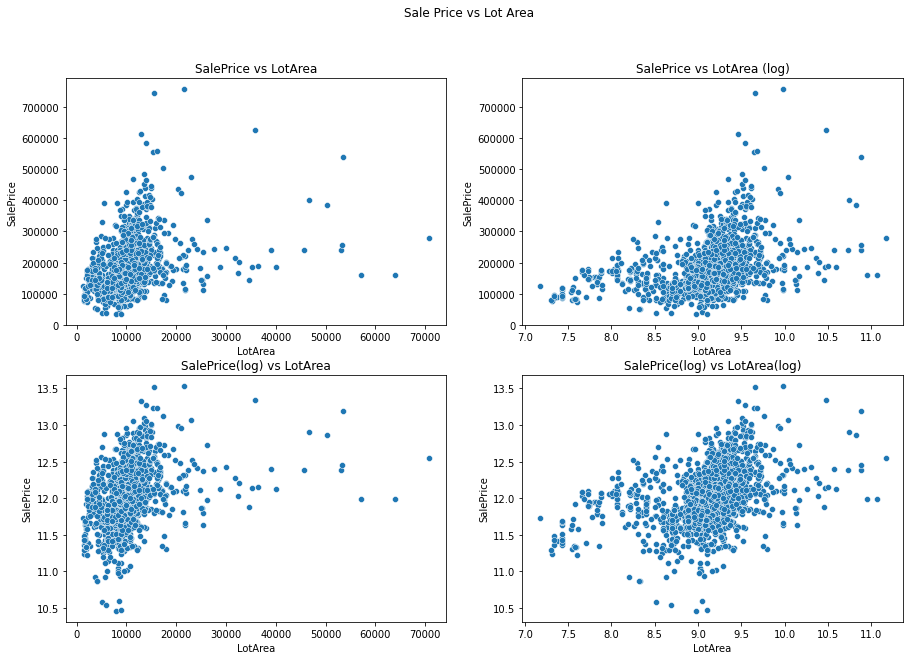

In [81]:
# remove the 4 properties, plot and get the correlation with sales price.
# Also plot and get correlations for the log transformed variables.

index = df_train.loc[df_train.LotArea > 100000, :].index
df_train_temp = df_train.drop(index)

log_price = np.log(df_train_temp.SalePrice)
log_lotarea = np.log(df_train_temp.LotArea)


fig, axes = plt.subplots(2, 2, sharey=False, figsize=(15, 10))
fig.suptitle('Sale Price vs Lot Area \n')

sns.scatterplot(ax=axes[0, 0], x = df_train_temp.LotArea, y = df_train_temp.SalePrice)
axes[0, 0].set_title('SalePrice vs LotArea')

sns.scatterplot(ax=axes[0, 1], x = log_lotarea, y = df_train_temp.SalePrice)
axes[0, 1].set_title('SalePrice vs LotArea (log)')

sns.scatterplot(ax=axes[1, 0], x = df_train_temp.LotArea, y = log_price)
axes[1, 0].set_title('SalePrice(log) vs LotArea')

sns.scatterplot(ax=axes[1, 1], x = log_lotarea, y = log_price)
axes[1, 1].set_title('SalePrice(log) vs LotArea(log)')

In [89]:
print('Sales Price vs Lot Area')
easycorr(df_train_temp.SalePrice, df_train_temp.LotArea)

print('Sales Price vs Log Lot Area')
easycorr(df_train_temp.SalePrice, log_lotarea)

print('Log Sales Price vs Lot Area')
easycorr(log_price, df_train_temp.LotArea)

print('Log Sales Price vs Log Lot Area')
easycorr(log_price, log_lotarea)

Sales Price vs Lot Area
Corr coef:  SalePrice vs LotArea :  0.3545
Sales Price vs Log Lot Area
Corr coef:  SalePrice vs LotArea :  0.3841
Log Sales Price vs Lot Area
Corr coef:  SalePrice vs LotArea :  0.3489
Log Sales Price vs Log Lot Area
Corr coef:  SalePrice vs LotArea :  0.3968


This gives us a much better picture. The correlation for the untransformed features has increased to 0.35. With both features log transformed, the correlation is almost 0.4.

**NOTE:** Remove 3 or 4 outliers in terms of Lot Area before modelling. (LotArea > 100000 or LotArea > 150000 respectively). Logtransform LotArea. Sale price will most likely need a log transformation as well.

D:\ML\venvs\defenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

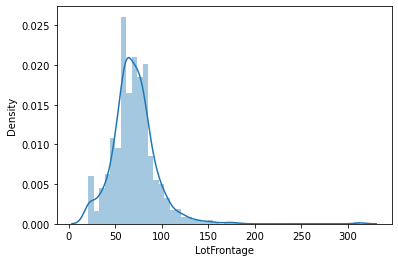

In [98]:
sns.distplot(df_train['LotFrontage'])

<AxesSubplot:xlabel='LotFrontage'>

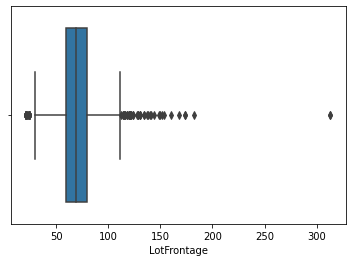

In [99]:
sns.boxplot(data=df_train, x = 'LotFrontage')

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

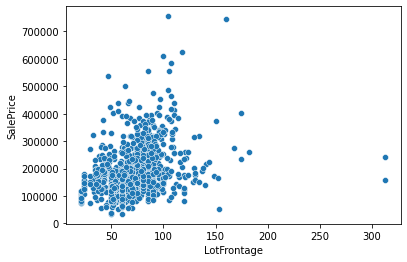

In [100]:
sns.scatterplot(x = df_train.LotFrontage, y = df_train.SalePrice)

There are also 2 outliers in terms of LotFrontage that we can possibly remove. Before we can calculate the correlation between sales price, we'll need to impute the missing values.

In [101]:
df_train.loc[df_train.LotFrontage > 300, :]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasPool,HasMisc
934,935,20,RL,313.0,27650,Pave,None,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425,Unf,0,160,585,GasA,Ex,Y,SBrkr,2069,0,0,2069,1,0,2,0,4,1,Gd,9,Typ,1,4,Attchd,1960.0,RFn,2,505,TA,TA,Y,0,0,0,0,0,None,None,0,11,2008,WD,Normal,242000,0,0
1298,1299,60,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,4,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,None,None,0,1,2008,New,Partial,160000,1,0


In order to impute there are several options. Something involving the median seems more reasonable than the mean, since there are outliers. Instead of the global median, it might be better to use the median per neighbourhood.

<AxesSubplot:xlabel='LotFrontage', ylabel='Neighborhood'>

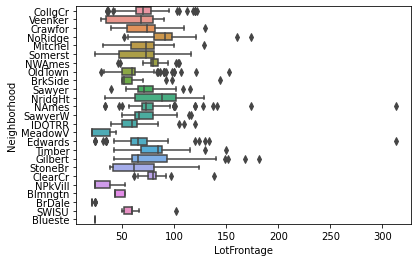

In [102]:
sns.boxplot(data=df_train, y='Neighborhood', x='LotFrontage')

In [103]:
# get the median Lot Frontage by neighbourhood. Only in train set to avoid data leakage from the test set.
lot_by_neigh = df_train.LotFrontage.groupby(df_train.Neighborhood).median()

# replace nans in both train and test sets by the median by neighbourhood.
for i in range(0, df_train.shape[0]):
    if pd.isna(df_train.LotFrontage[i]):
        df_train.LotFrontage[i] = lot_by_neigh.loc[df_train.Neighborhood[i]]  
        

for i in range(0, df_test.shape[0]):
    if pd.isna(df_test.LotFrontage[i]):
        df_test.LotFrontage[i] = lot_by_neigh.loc[df_test.Neighborhood[i]] 

C:\Users\perre\AppData\Local\Temp/ipykernel_18752/2622557445.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.LotFrontage[i] = lot_by_neigh.loc[df_train.Neighborhood[i]]
C:\Users\perre\AppData\Local\Temp/ipykernel_18752/2622557445.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.LotFrontage[i] = lot_by_neigh.loc[df_test.Neighborhood[i]]


Corr coef:  LotFrontage vs SalePrice :  0.3499


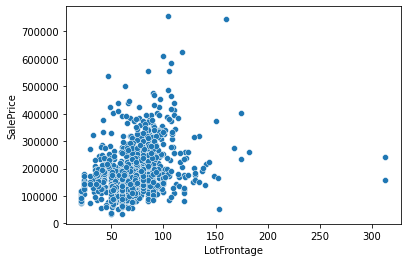

In [104]:
sns.scatterplot(x = df_train.LotFrontage, y = df_train.SalePrice)
easycorr(df_train.LotFrontage, df_train.SalePrice)

LotFrontage also correlates positively with sales price (0.35)

In [105]:
feats_cont(df_train, 'Lot')

,LotFrontage,LotArea,LotShape,LotConfig
0,65.0,8450,Reg,Inside
1,80.0,9600,Reg,FR2
2,68.0,11250,IR1,Inside
3,60.0,9550,IR1,Corner
4,84.0,14260,IR1,FR2
...,...,...,...,...
1455,62.0,7917,Reg,Inside
1456,85.0,13175,Reg,Inside
1457,66.0,9042,Reg,Inside
1458,68.0,9717,Reg,Inside


Let's investigate a bit the effect of LotShape and LotConfig on sales price.

D:\ML\venvs\defenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\ML\venvs\defenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\ML\venvs\defenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\ML\venvs\defenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'vs LotConfig')

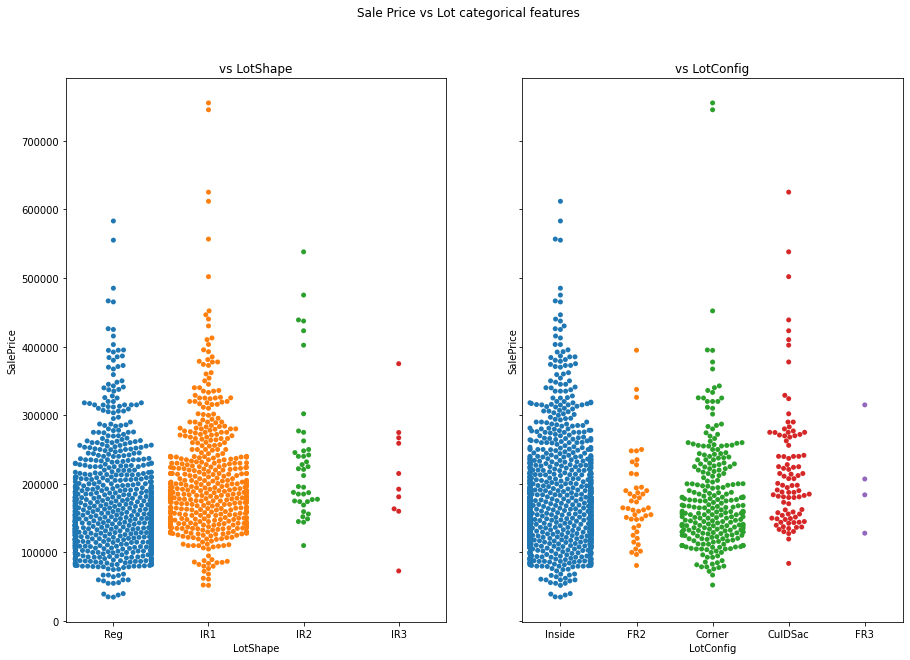

In [106]:
# couple of useful exploratory plots for fireplace features

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 10))
fig.suptitle('Sale Price vs Lot categorical features \n')

sns.swarmplot(ax=axes[0], data=df_train, x = 'LotShape', y = 'SalePrice')
axes[0].set_title('vs LotShape')

sns.swarmplot(ax=axes[1], data=df_train, x = 'LotConfig', y = 'SalePrice')
axes[1].set_title('vs LotConfig')

There seems to be some difference between groups. Moreso in LotShape. The features need to be one-hot encoded.